In [104]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.filters import threshold_li
from skimage.exposure import equalize_adapthist
from skimage.morphology import remove_small_objects, disk, ball
from scipy.ndimage import median_filter

In [107]:
# fig. 4 EMT volume
img = imread('/Volumes/davidh-ssd/chromemt_data/49801.tif')

# rough location of first patch
cut_siz = 94 # 94px ~ 120nm at 1.28nm pixel size
off = 0, 140, 40

cut = img[tuple((slice(o, o+cut_siz) for o in off))]

In [108]:
def segment_like_paper(patch, clahe_size=78, min_object_size=500, radius=2):
    '''
    Segmentation pipeline similar to ChromEMT pipeline
    clahe_size is in pixels, 78 ~ 100nm at 1.28nm pixel size
    '''

    # 1) CLAHE
    patch_eq = equalize_adapthist(patch, clahe_size)
    
    # 2) Li thresholding
    mask = patch_eq < threshold_li(patch_eq)

    # 3) ImaheJ "Remove Outliers..." should correspond to median filter
    # TODO: planewise matches ImageJ more
    mask = median_filter(mask, footprint=ball(radius))

    # 4) remove small objects should correspond to size threshold in 3D Object Counter
    mask = remove_small_objects(mask, min_object_size)
    return mask


0.38998584128757596

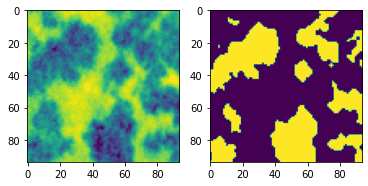

In [109]:
fig, axs = plt.subplots(ncols=2)
axs[0].imshow(cut[0])
axs[1].imshow(segment_like_paper(cut)[0])

# chromatin volume fraction
segment_like_paper(cut).sum() / np.prod(cut.shape)

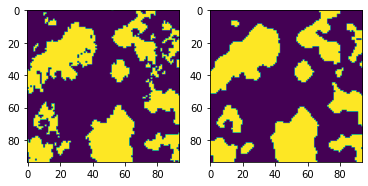

In [103]:
def hypersphere(rank, radius):
    """
    rank-n hypersphere, should be just like disk/ball
    """
    return np.linalg.norm(np.stack(np.meshgrid(*[np.arange(-radius, radius+1)]*rank, indexing='ij')), axis=0)<=(radius)

patch_eq = equalize_adapthist(cut, 78)
mask = patch_eq < threshold_li(patch_eq)

fig, axs = plt.subplots(ncols=2)
axs[0].imshow(mask[0])
axs[1].imshow(median_filter(mask[0], footprint=disk(2.5)))